# Regresión lineal

La regresión es uno de los modelos de aprendizaje más supervisados que existen en el ámbito del *machine learning*. Su objetivo principal es estimar un valor continuo a partir de un vector de características. Aunque a priori hablar de "*modelos de aprendizaje automático para regresión lineal*" pueda parecer un concepto vanguardista e innovador, no lo es, puesto que en las primeras etapas educativas ya se enseña a hacer una regresión simple. Ilustremos esto con un ejemplo.

Supongamos que tenemos los siguientes dos puntos en el espacio:

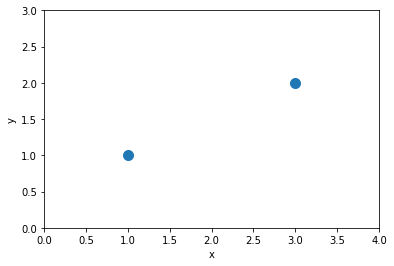

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 3])
y = np.array([1, 2])

plt.figure()

plt.xlim(0, 4)
plt.ylim(0, 3)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x, y, s=100)

Datos los puntos $p_1=(1,1)$ y $p_2=(3,2)$ la ecuación de la recta que pasa por ellos viene definida por:

$$
\frac{x - 1}{3 - 1} = \frac{y - 1}{2 - 1}
$$

Lo que despejando deja:

$$
y = \frac{1}{2} \cdot x + \frac{1}{2} = 0.5 \cdot x + 0.5
$$

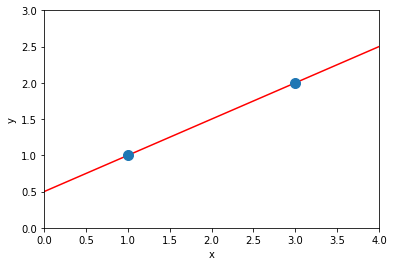

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

plt.xlim(0, 4)
plt.ylim(0, 3)

plt.xlabel('x')
plt.ylabel('y')

# points
x = np.array([1, 3])
y = np.array([1, 2])
plt.scatter(x, y, s=100, zorder=10)

# line
line = np.linspace(0, 4)
plt.plot(line, 0.5 * line + 0.5, c='red')

Esta recta es lo que denominamos **recta de regresión** y nos permite, conocido un valor de *x* determinar el valor real de *y*. Por ejemplo, sabemos que para $x=2$ el valor de $y=0.5\cdot2+0.5=1.5$. Dicho con otras palabras, estamos estimando el valor *y* a partir de *x*.

Si trasladamos este concepto al ámbito del *machine learning* diremos que hemos aprendido la ecuación de la recta, o lo que es lo mismo, el **modelo de regresión**, a partir de los puntos de un cojunto de datos (en el ejemplo anterior los puntos $p_1=(1,1)$ y $p_2=(3,2)$). El proceso de aprendizaje ha consistido en estimar los párametros de la ecuación de la recta en función de los valores de los puntos que conforman el modelo de datos. Recordamos que la ecuación general de la recta tiene la forma:

$$
y = m \cdot x + b
$$

Que comparándolo con el modelo aprendido $y = 0.5 \cdot x + 0.5$ nos indica que se ha aprendido que para estimar correctamente los puntos $p_1=(1,1)$ y $p_2=(3,2)$ la pendiente de la recta debe ser $m=0.5$ y la interescción (o *bias*) debe ser $b=0.5$.

El ejemplo anterior tiene fines didácticos, trabajar en el mundo del *machine learning* con conjuntos de datos implica una dimensionalidad mayor: habrá muchos más puntos (filas del conjunto de datos) y características (columnas del conjunto de datos). Por ello, los modelos de regresión se suelen generalizar del siguiente modo:

$$
Y = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \cdots + \beta_m \cdot X_m + \epsilon
$$

Donde:

- $\beta_0$ se corresponde con el *bias* de la recta.
- $\beta_1, \dots, \beta_m$ son los parámetros de la pendiente de la recta en las diferentes dimensiones
- $\epsilon$ representa el error que cometemos al no poder aproximar perfectamente todos los puntos. Nótese que cuando tenemos más de 2 puntos es prácticamente imposible encontrar una **recta** que pase por todos ellos.

Podemos escribir la expresión anterior usando una notación más compacta de matrices:

$$
Y = X \cdot \beta + \epsilon
$$

Siendo:

\begin{equation}
Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}
\end{equation} 

La matriz que contiene los valores de la variable objetivo (i.e. la variable que queremos predecir) para la *n* muestras del conjunto de datos.

\begin{equation}
X = \begin{pmatrix} 1 & x_{1,1} & \cdots & x_{1,m} \\ 1 & x_{2,1} & \cdots & x_{2,m} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n,1} & \cdots & x_{n,m} \end{pmatrix}
\end{equation}

La matriz que contiene los valores de las *m* carácterísticas ($x_{i,j}$) del conjunto de datos.

\begin{equation}
\beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_m \end{pmatrix}
\end{equation}

La matriz de coeficientes del modelo de regresión **que se van a aprender**.

\begin{equation}
\epsilon = \begin{pmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{pmatrix}
\end{equation}

La matriz con los residuos.

A partir de estas matrices podemos obtener un sistema de ecuaciones formado por *n* ecuaciones y *m* incógnitas. Normalmente, en *machine learning* disponemos de muchas más muestras que características, por lo que $n >> m$ y el sistema es *sobredimensionado* y la solución exacta no existe (tenemos infinitas soluciones posibles). Utilizando el método de los [mínimos cuadrados ordinarios](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados_ordinarios) podemos buscar la solución que obtenga el mejor $\beta$ y minimize $|\epsilon|^2$.

\begin{equation}
\begin{split}
\frac{\partial |\epsilon|^2}{\partial \beta} &= \frac{\partial |Y-X\beta|^2}{\partial \beta} \\
&= \frac{\partial \left[ (Y-X\beta)^t (Y-X\beta) \right] }{\partial \beta} \\
&= \frac{\partial \left[ Y^tY - \beta^tX^tY - Y^tX\beta + \beta^tX^tX\beta \right] }{\partial \beta} \\
&= - 2 X^t Y + 2 X^t X \beta = 0
\end{split}
\end{equation}

Por tanto, podemos *aprender* los valores de los coeficientes que minimizan los residuos a partir de los datos del siguiente modo:

$$
\beta = \left[ \left( X^t X \right)^{-1} X^t \right] Y
$$

Gráficamente tenemos que dados los siguientes puntos:

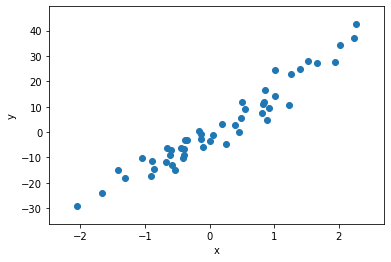

In [3]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=50, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=43)

plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X[:,0], y)

Podemos calcular $\beta$:

In [4]:
n,m = X.shape
x0 = np.ones((n,1))
stack = np.hstack((x0, X))

# beta = ((X^t * X)^-1 * X^t) * y
beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(stack), stack)), np.transpose(stack)), y)
beta

array([-0.12197581, 15.45017385])

Y pintar la recta de regresión del modelo de acuerdo con la ecuación:

$$
\hat{y} = \beta_0 + \beta_1 \cdot x_1
$$

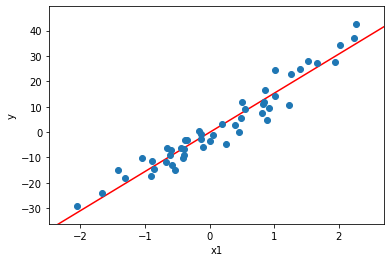

In [5]:
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x1')
plt.ylabel('y')

plt.scatter(X[:,0], y, zorder=10)

line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, beta[0] + beta[1] * line, c='red')

Estos mismo cálculos podemos hacerlo, de forma más simple, usando el modelo `linear_model.LinearRegression` de `sklearn`:

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

Es posible acceder a los **parámetros** del modelo (i.e. los $\beta$) mediante los atributos `coef_` ($\beta_1$) e `intercept_` ($\beta_0$):

In [7]:
reg.coef_

array([15.45017385])

In [8]:
reg.intercept_

-0.12197581019055637

## Interpretación de la regresión lineal

Entendido el modelo de regresión lineal debemos indagar en el significado de los parámetros $\beta$ aprendidos por el modelo. Para ello, en lugar de usar un modelo tan sencillo, vamos a utilizar el conjunto de datos de [* boston house-prices*](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset) que contiene las siguientes columnas:

- **CRIM**: crimen per cápita por ciudad
- **ZN**: proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
- **INDUS**: proporción de acres de negocios no minoristas por ciudad
- **CHAS**: variable ficticia de Charles River (= 1 si el tramo limita el río, 0 de lo contrario)
- **NOX**: concentración de óxidos nítricos (partes por 10 millones)
- **RM**: número promedio de habitaciones por vivienda
- **AGE**: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- **DIS**: distancias ponderadas a cinco centros de empleo de Boston
- **RAD**: índice de accesibilidad a las autopistas radiales
- **TAX**: tasa de impuesto a la propiedad de valor completo por 10.000\$
- **PTRATIO**: colegios por localidad
- **B**: 1000 (Bk - 0,63)^ 2, donde Bk es la proporción de personas de color por ciudad
- **LSTAT**: porcentaje de estado inferior de la población
- **MEDV**: valor mediano de las viviendas ocupadas por sus propietarios en 1000\$ (**variable objetivo**)

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

Aplicamos regresión lineal al conjunto de datos:

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

Analizamos el parámetro `intercept_`:

In [11]:
reg.intercept_

36.4594883850901

Su valor es 36.4594883850901 que representa el precio básico de cualquier vivienda sin contar con el resto de las características que describan la vivienda.

Ahora analizamos los coeficientes del modelo:

In [12]:
reg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

Y para ello vinculamos cada coeficiente a la característica (*feature*) a la que están representado:

In [13]:
import pandas as pd
pd.DataFrame(data=np.expand_dims(reg.coef_, axis=0), columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758


Como norma general:

- Los valores positivos en estos coeficientes significan una correlación directa entre los valores de las características que representan los coeficientes y el precio de la vivienda, mientras que los valores negativos representan una correlación inversa.
- La magnitud de los coeficientes miden el grado de aportación, positiva o negativa, de una determinada característica al precio de la vivienda.

Por poner algunos ejemplos:

- Un valor -17.766611 en NOX indica que el precio de la vivienda se **decrementa** en aproximadamente 18000\$ por cada parte por 10 millones de concentración de óxidos nítricos.
- Un valor de 3.809865 en RM indica que el precio de la vivienda **incrementa** en aproximadamente 4000\$ por cada habitación de la vivienda.
- Un valor de 0.000692 en AGE indica que el precio de la vivienda se **mantiene** constante (tiene un incremento de 6\$) tanto si las casas están ocupadas por sus propietarios como si son alquiladas.

## Problemas de la regresión lineal

La regresión linea presenta principalmente 3 problemas: sobreajuste, escalabilidad y linealidad.

### Sobreajuste

El modelo de regresión lineal tiene un problema sobreajuste (en inglés *overfitting*) puesto que no es capaz de generalizar bien la línea de regresión en determinados contextos. Por ejemplo, cuando nuestro conjunto de datos contiene datos atípicos (*outlayers*), es decir, muestras que no siguen el patrón predominante en el conjunto de datos, la regresión lineal tiende a desviarse de su ideal prestando excesiva atención a estos datos atípicos.

El siguiente ejemplo muestra, de forma gráfica, este proceso. Observamos nuestro conjunto de datos (puntos azules) y los *outlayers* (puntos naranjas). En verde aparece la regresión que se produciría si no existieran *outlayers* y en rojo la que se obtiene con los *outlayers*. Como vemos, unas pocas muestras han desviado significativamente la regresión provocando errores de predicción.

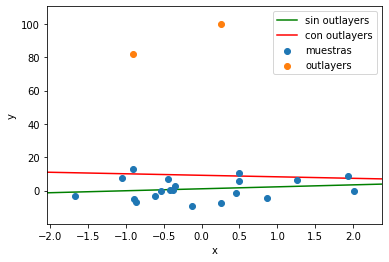

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# conjunto de datos
n_samples = 20
n_outlayers = 2

X, y = make_regression(n_samples=n_samples, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=43)

X_outlayers, y_outlayers = make_regression(n_samples=n_outlayers, n_features=1, n_informative=1, n_targets=1, noise=5, bias=100, random_state=43)

X = np.vstack((X, X_outlayers))
y = np.hstack((y, y_outlayers))

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10, label="muestras")
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10, label="outlayers")

# regresion sin outlayers
reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, c='green', label="sin outlayers")

# regresion con outlayers
reg_outlayers = LinearRegression().fit(X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg_outlayers.intercept_ + reg_outlayers.coef_[0] * line, c='red', label="con outlayers")

# mostrar el gráfico
plt.legend()
plt.show()

### Escalabilidad

Como ya hemos comentado, obtener los parámetros de la regresión lineal implica las siguientes operaciones matriciales $\beta = \left[ \left( X^t X \right)^{-1} X^t \right] Y$. Es decir, para poder calcular los parámetros del modelo requerimos hacer 3 multiplicaciones de matrices y una matriz inversa. Estas operaciones matemáticas, en su implementación más eficiente (*Optimized CW-like algorithms*) tienen un coste computacional de $O(n^{2.373})$. Por ello, el rendimiento del algoritmo de regresión lineal se ve profundamente mermado con conjuntos de datos grandes lo que hace que el modelo no sea escalable.

### Linealidad

La regresión lineal, como su propio nombre indica, asume linealidad en la correlación entre la variable objetivo y las características del conjunto de datos. Sin embargo, en los problemas del mundo real, esta linealidad raramente se cumple, lo que provoca que el modelo no estime bien debido al *underfitting*. 

El siguiente ejemplo muestra una relación no lineal entre la variable objetivo *y* y la característica *x*. Concretamente $y = 3 - 2x + x^3$ (con ruido añadido). Observamos que el modelo (línea roja) no se ajusta nada bien a los datos.

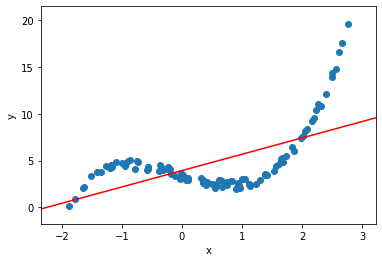

In [15]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

n_samples = 100

np.random.seed(43)

X = np.expand_dims(np.linspace(-2, 2, n_samples), axis=1) + np.random.rand(n_samples,1)
y = 3 - 2 * X + X * X * X + np.random.rand(n_samples,1)

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X, y)

reg = LinearRegression().fit(X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, c='red')

plt.show()

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es).

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">